In [1]:
###################################################################################################
#
# resolution_comparison_plot.py 	(c) Ian Williams, Adnan Khan, Matt McQuinn
#     				    	        ianw89@live.com
#
###################################################################################################

import matplotlib.pyplot as plt
from cgmbrush.cgmbrush import *
from cgmbrush.plots.plots import *

date = '2021-11-01'

provider = BolshoiProvider()
STH_config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=1)
STH_config.datestamp = date
STH1_256 = STH_config.get_addition_field()
STH1_hist = create_histograms(STH_config.get_final_field(), STH_config.resolution*1024)
STH_config.clear_results()

STH_config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=2)
STH_config.datestamp = date
STH2_256 = STH_config.get_addition_field()
STH2_hist = create_histograms(STH_config.get_final_field(), STH_config.resolution*1024)
STH_config.clear_results()

STH_config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=4)
STH_config.datestamp = date
STH4_256 = STH_config.get_addition_field()
STH4_hist = create_histograms(STH_config.get_final_field(), STH_config.resolution*1024)
STH_config.clear_results()

STH_config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=8)
STH_config.datestamp = date
STH8_256 = STH_config.get_addition_field()
STH8_hist = create_histograms(STH_config.get_final_field(), STH_config.resolution*1024)
STH_config.clear_results()

STH_config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=16)
STH_config.datestamp = date
STH16_256 = STH_config.get_addition_field()
STH16_hist = create_histograms(STH_config.get_final_field(), STH_config.resolution*1024)
STH_config.clear_results()

STH_config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=32)
STH_config.datestamp = date
STH32_256 = STH_config.get_addition_field()
STH32_hist = create_histograms(STH_config.get_final_field(), STH_config.resolution*1024)
STH_config.clear_results()

fire_config = Configuration(FireProfile(), 1, provider=provider, resolution=1)
fire_config.datestamp = date
fire1_hist = create_histograms(fire_config.get_final_field(), fire_config.resolution*1024)
fire_config.clear_results()

fire_config = Configuration(FireProfile(), 1, provider=provider, resolution=2)
fire_config.datestamp = date
fire2_hist = create_histograms(fire_config.get_final_field(), fire_config.resolution*1024)
fire_config.clear_results()

fire_config = Configuration(FireProfile(), 1, provider=provider, resolution=4)
fire_config.datestamp = date
fire4_hist = create_histograms(fire_config.get_final_field(), fire_config.resolution*1024)
fire_config.clear_results()

fire_config = Configuration(FireProfile(), 1, provider=provider, resolution=8)
fire_config.datestamp = date
fire8_hist = create_histograms(fire_config.get_final_field(), fire_config.resolution*1024)
fire_config.clear_results()

fire_config = Configuration(FireProfile(), 1, provider=provider, resolution=16)
fire_config.datestamp = date
fire16_hist = create_histograms(fire_config.get_final_field(), fire_config.resolution*1024)
fire_config.clear_results()

fire_config = Configuration(FireProfile(), 1, provider=provider, resolution=32)
fire_config.datestamp = date
fire32_hist = create_histograms(fire_config.get_final_field(), fire_config.resolution*1024)
fire_config.clear_results()


### PLOT SETTINGS ###
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
XBIG_SIZE = 18
axis_fontsize = 12
curve_lw = 3
axis_label = 24
sub_title_size= 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=axis_fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=axis_label)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=sub_title_size)  # fontsize of the figure title

In [4]:

def make_resolution_image_comparison(vmax):
    """Image plots of methodology. Comparing resolutions of the halos re-added density field."""

    u=15
    vmin = 0

    fields = [
        ('Resolution: 4096', STH4_256[0,0:4*u,0:4*u]),
        ('Resolution: 8192', STH8_256[0,0:8*u,0:8*u]),
        ('Resolution: 16384', STH16_256[0,0:16*u,0:16*u]),
        ('Resolution: 32768', STH32_256[0,0:32*u,0:32*u])
    ]
    
    return fields_comparison_plot(fields, vmin, vmax, 'implot_resolution_comparison_%s.pdf' % vmax)
    
 


def make_resolution_DM_histogram_comparison():

    fig, axs = plt.subplots(1, 2, sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

    # fig, axs = plt.subplots(2, 1, sharex='col', sharey='row',
    #                         gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(10,20))


    # Left panel
    axs[0].plot(STH1_hist[0],STH1_hist[1] / np.sum(STH1_hist[1]),'-',label='1024',lw=curve_lw,color='r')
    axs[0].plot(STH2_hist[0],STH2_hist[1] / np.sum(STH2_hist[1]),'-',label='2048',lw=curve_lw,color='g')
    axs[0].plot(STH4_hist[0],STH4_hist[1] / np.sum(STH4_hist[1]),'-',label='4096',lw=curve_lw,color='b')
    axs[0].plot(STH8_hist[0],STH8_hist[1] / np.sum(STH8_hist[1]),'-',label='8192',lw=curve_lw,color='k')
    axs[0].plot(STH16_hist[0],STH16_hist[1] / np.sum(STH16_hist[1]),'-',label='16384',lw=curve_lw,color='m')
    axs[0].plot(STH32_hist[0],STH32_hist[1] / np.sum(STH32_hist[1]),'-',label='32768',lw=curve_lw,color='c')

    # Right panel
    axs[1].plot(fire1_hist[0],fire1_hist[1] / np.sum(fire1_hist[1]),'-',label='1024',lw=curve_lw,color='r')
    axs[1].plot(fire2_hist[0],fire2_hist[1] / np.sum(fire2_hist[1]),'-',label='2048',lw=curve_lw,color='g')
    axs[1].plot(fire4_hist[0],fire4_hist[1] / np.sum(fire4_hist[1]),'-',label='4096',lw=curve_lw,color='b')
    axs[1].plot(fire8_hist[0],fire8_hist[1] / np.sum(fire8_hist[1]),'-',label='8192',lw=curve_lw,color='k')
    axs[1].plot(fire16_hist[0],fire16_hist[1] / np.sum(fire16_hist[1]),'-',label='16384',lw=curve_lw,color='m')
    axs[1].plot(fire32_hist[0],fire32_hist[1] / np.sum(fire32_hist[1]),'-',label='32768',lw=curve_lw,color='c')

    axs[0].set_xlim(0,200)
    axs[1].set_xlim(0.01,200)

    axs[0].set_ylabel('P(DM)',fontsize='30')

    axs[0].legend(loc='upper right',prop={'size':'25'})
    # plt.setp(leg.get_title(),fontsize=20)

    # plt.ylim(0,1)

    fig.text(0.5, 0.04, 'DM [pc cm$^{-3}$]', ha='center',fontsize=30)

    axs[0].set_title('Profile: Spherical Tophat',size='30')
    axs[1].set_title('Profile: FIRE ',size='30')

    # Size of ticks
    axs[0].tick_params(axis='both', which='major', labelsize=24)
    axs[1].tick_params(axis='both', which='major', labelsize=24)

    saveFig('hist_resolution_comparison.pdf', fig, bbox_inches='tight')

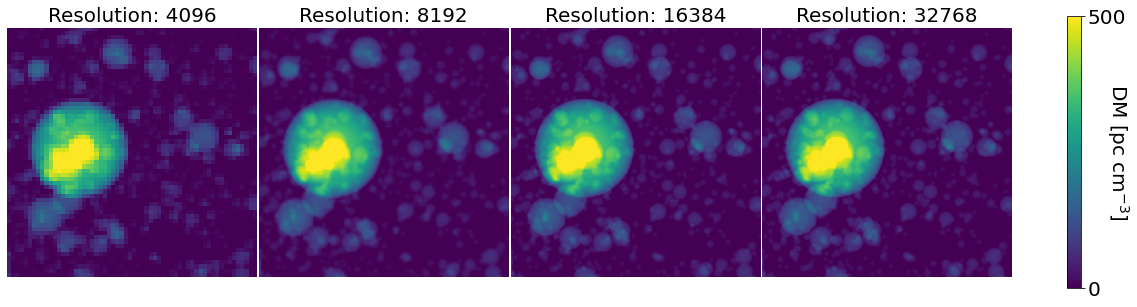

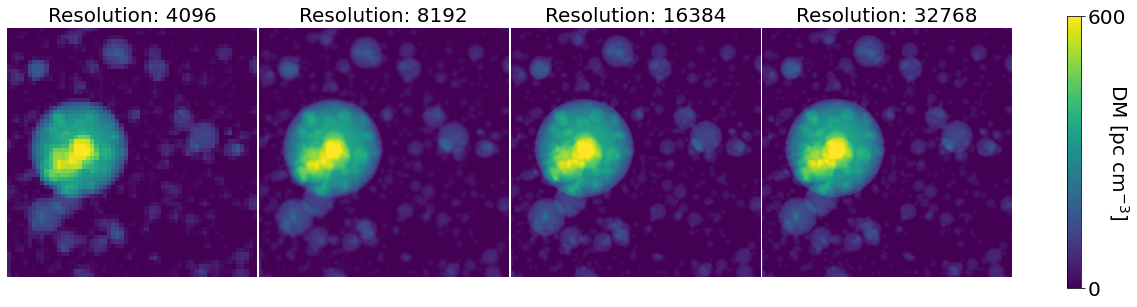

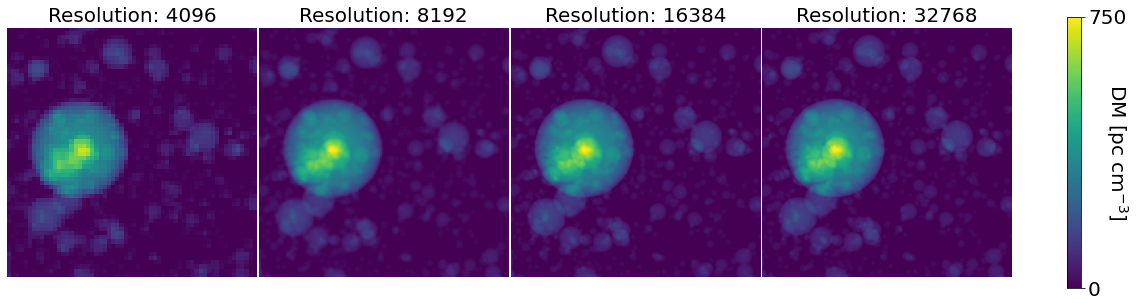

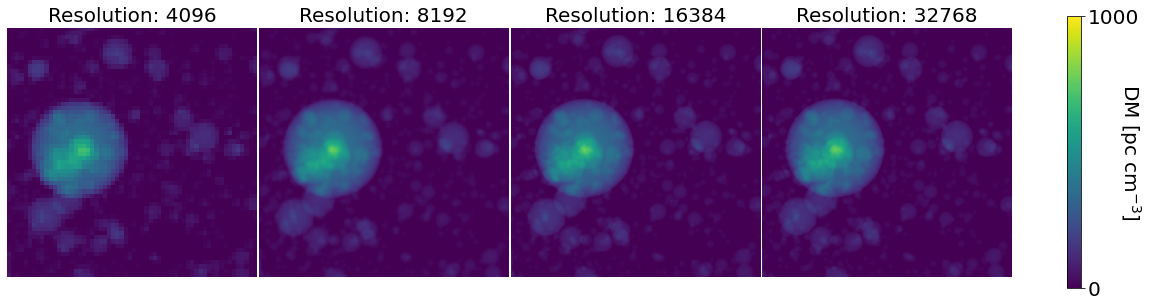

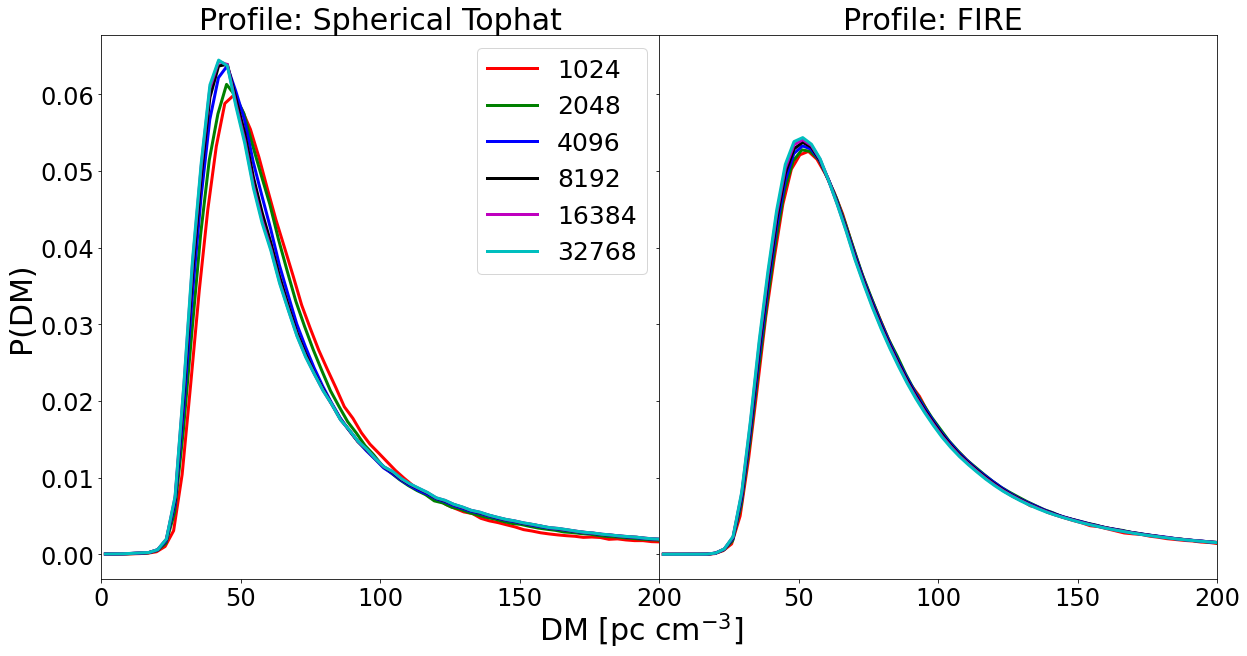

In [5]:
make_resolution_image_comparison(500)
make_resolution_image_comparison(600)
make_resolution_image_comparison(750)
make_resolution_image_comparison(1000)

make_resolution_DM_histogram_comparison()
